In [1]:
#@title
import matplotlib.pyplot as plt;
import pandas as pd
import numpy  as np
from   scipy.stats import norm 
from   google.colab import drive

drive.mount('/content/drive')
url = '/content/drive/My Drive/Colab Notebooks/estadistica/Tarea 3/datasetTarea2.csv'
df = pd.read_csv(url, decimal=',', quotechar='\'')

def printTable(table):
  col_width = max(len(word) for row in table for word in row) + 2  # padding
  for row in table:
      print("".join(word.ljust(col_width) for word in row))
  print("")

def getSample(array, n):
  return np.random.choice(array, n, replace=False)

def confidenceInterval(conf, sigma, sample):
  a = 1 - conf
  z = norm.ppf(1 - (a / 2))
  n = len(sample)
  p = (z * sigma) / np.sqrt(n)
  xmu = np.mean(sample)
  return [conf, xmu, p, xmu-p, xmu+p]

def clearErrorbar():
  plotConf.clear()
  plotXmu.clear()
  plotP.clear()
  plotLolim.clear()
  plotUplim.clear()

def addErrorbar(conf, xmu, p, lolim, uplim):
  plotConf.append(conf)
  plotXmu.append(xmu)
  plotP.append(p)
  plotLolim.append(lolim)
  plotUplim.append(uplim)

plotConf = []
plotXmu = []
plotP = []
plotLolim = []
plotUplim = []

def createConfidenceIntervalsConfs(confs, colName, n):
  col = df[colName]
  colSigma = np.std(col)
  colMu = np.mean(col)
  colSample = getSample(col, n)
  table = [["confidence", "rho(+/-)", "l", "u", "H0"]]

  clearErrorbar()

  for conf in confs:
    (conf, xmu, p, lolim, uplim) = confidenceInterval(conf, colSigma, colSample)
    addErrorbar(conf, xmu, p, lolim, uplim)
    table.append([str(conf), str(p), str(lolim), str(uplim), str(lolim &lt; colMu &lt; uplim)])

  plt.errorbar(plotConf, plotXmu, yerr=plotP, uplims=True, lolims=True, fmt='o')
  plt.hlines(colMu, min(plotConf), max(plotConf), colors='k', linestyles='dotted', label='mu')
  plt.title(colName)
  plt.legend(loc='best', frameon=False)
  plt.show()
  print("\n{} mean: {}\n{} std dev:{}\nn:{}\nsample mean: {}\n".format(colName, colMu, colName, colSigma, n, np.mean(colSample)))
  printTable(table)

def createConfidenceIntervalsN(conf, colName, ns):
  col = df[colName]
  colSigma = np.std(col)
  colMu = np.mean(col)
  table = [["n", "sample mean", "rho(+/-)", "l", "u", "H0"]]

  clearErrorbar()
  
  for n in ns:
    (conf, xmu, p, lolim, uplim) = confidenceInterval(conf, colSigma, getSample(col, n))
    addErrorbar(n, xmu, p, lolim, uplim)
    table.append([str(n), str(xmu), str(p), str(lolim), str(uplim), str(lolim &lt; colMu &lt; uplim)])

  plt.errorbar(plotConf, plotXmu, yerr=plotP, uplims=True, lolims=True, fmt='o')
  plt.hlines(colMu, min(plotConf), max(plotConf), colors='k', linestyles='dotted', label='mu')
  plt.title(colName)
  plt.legend(loc='best', frameon=False)
  plt.show()
  print("\n{} mean: {}\n{} std dev:{}\nconfidence: {}\n".format(colName, colMu, colName, colSigma, conf))
  printTable(table)
  
def createConfidenceIntervalsSamples(conf, colName, n, samples):
  col = df[colName]
  colSigma = np.std(col)
  colMu = np.mean(col)
  table = [["sample", "sample mean", "rho(+/-)", "l", "u", "H0"]]
  histData = []

  clearErrorbar()
  
  for i in range(samples):
    (conf, xmu, p, lolim, uplim) = confidenceInterval(conf, colSigma, getSample(col, n))
    addErrorbar(i, xmu, p, lolim, uplim)
    histData.append(xmu)
    table.append([str(i), str(xmu), str(p), str(lolim), str(uplim), str(lolim &lt; colMu &lt; uplim)])

  plt.errorbar(plotConf, plotXmu, yerr=plotP, uplims=True, lolims=True, fmt='o')
  plt.hlines(colMu, min(plotConf), max(plotConf), colors='k', linestyles='dotted', label='mu')
  plt.title(colName)
  plt.legend(loc='best', frameon=False)
  plt.show()
  print("\n{} mean: {}\n{} std dev:{}\nn:{}\nconfidence: {}\n".format(colName, colMu, colName, colSigma, n, conf))
  printTable(table)
  plt.hist(histData, 9, density=True, cumulative=False)
  plt.title("{} samples mean distribution, n={}".format(colName, n))
  plt.show()
  print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
  

def sampleSize(rho, alpha, sigma):
  return ((sigma * norm.ppf(alpha / 2)) / rho) ** 2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Tarea #3
# Presentado por Esteban García

La presente asignación busca que los estudiantes apliquen intervalos de confianza y pruebas de hipótesis como un medio para explorar los conjuntos de datos de la Tarea \#2. En esa tarea se pidió analizar un grupo de columnas en busca de las distribuciones que modelaban más adecuadamente cada una.

Se pide a los estudiantes que seleccionen 2 columnas de variables cuantitativas del conjunto de datos y exploren intervalos de confianza y el contexto alrededor de ellos. 

**R/ Se selecionaron las columnas price y table.**

Para toda esta tarea vamos a suponer que el set de datos de diamantes es nuestra población de interés. Partiendo de este supuesto, para ambas columnas se debe proponer una hipótesis nula para el valor de la media igual al promedio poblacional. Asimismo, deben calcular la desviación estándar poblacional.

Con estas "medias teóricas" los estudiantes deberán, para ambas columnas:
- Seleccionar una muestra con un $n$ = 40.
- Crear 1 intervalo de confianza para la media con un nivel de confianza de 90\% y concluir con respecto a la hipótesis nula.(**10 puntos**)
- Igual que el anterior, con un nivel de confianza de 95% y concluir con respecto a la hipótesis nula. (**5 puntos**)
- Igual que el anterior, con una confianza de 99% y concluir con respecto a la hipótesis nula. (**5 puntos**)

**R/ Como se puede ver en las tablas presentadas a continuación solamente en el caso de la columna price con nivel de confianza de 90% no se cumple $H_0$. Esto pues $l &lt;\mu$ $(3751.065 &lt; 3794.503)$. Para todos los demás casos se satisface $H_0$**



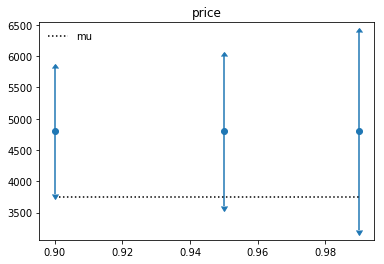


price mean: 3751.065
price std dev:3875.037052826075
n:40
sample mean: 4802.3

confidence          rho(+/-)            l                   u                   H0                  
0.9                 1007.7971379927669  3794.5028620072335  5810.097137992767   False               
0.95                1200.864357668855   3601.435642331145   6003.164357668855   True                
0.99                1578.2032866265922  3224.096713373408   6380.503286626592   True                



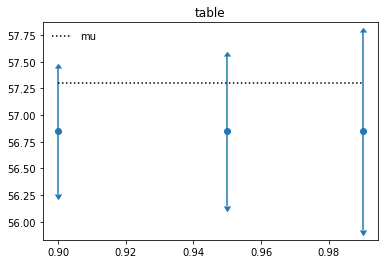


table mean: 57.298500000000004
table std dev:2.2752687203932647
n:40
sample mean: 56.85

confidence          rho(+/-)            l                   u                   H0                  
0.9                 0.5917386784481194  56.258261321551885  57.44173867844812   True                
0.95                0.7051001250288509  56.14489987497115   57.55510012502885   True                
0.99                0.9266586418482177  55.92334135815178   57.77665864184822   True                



In [2]:
np.random.seed(12345)
createConfidenceIntervalsConfs([0.90, 0.95, 0.99], "price", n=40)
createConfidenceIntervalsConfs([0.90, 0.95, 0.99], "table", n=40)

¿Qué concluye de los intervalos de confianza anteriores? ¿Aumentan, disminuyen, se mantienen igual?
Si hay cambios, ¿por qué ocurre esto? (10 puntos)

**R/Al aumentar el nivel de confianza se produce un aumento en el rango del intervalo de confianza. Esto tiene sentido pues al ampliar el rango se da más posibilidad de incluir la media poblacional en el intervalo. En consecuencia esto hace que el intervalo sea menos exacto.**

- Analizar al menos 3 valores de $n$, es decir use al menos 3 muestras aleatorias de diferentes tamaños. Explique que impacto tiene $n$ en el intervalo de confianza, además de la conclusión con la hipótesis nula. 
En este caso haga los cálculos para hacer la prueba de hipótesis para la media usando un nivel de confianza de 95\% (**20 puntos**)

> **En el análisis mostrado abajo vemos que al aumentar el $n$ se reduce el rango del intervalo de confianza y al parecer también hay una mejor aproximación de la media muestral en relación con la media poblacional.**

> **En los casos mostrados siempre se cumple $H_0$.**

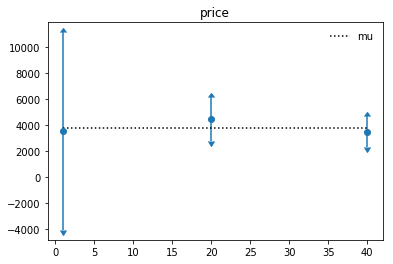


price mean: 3751.065
price std dev:3875.037052826075
confidence: 0.95

n                   sample mean         rho(+/-)            l                   u                   H0                  
1                   3519.0              7594.933062297342   -4075.933062297342  11113.933062297343  True                
20                  4445.05             1698.27866118575    2746.77133881425    6143.32866118575    True                
40                  3478.975            1200.864357668855   2278.110642331145   4679.839357668855   True                



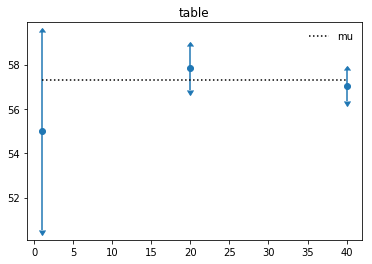


table mean: 57.298500000000004
table std dev:2.2752687203932647
confidence: 0.95

n                   sample mean         rho(+/-)            l                   u                   H0                  
1                   55.0                4.459444747121333   50.54055525287867   59.45944474712133   True                
20                  57.85               0.997162159646766   56.85283784035324   58.847162159646764  True                
40                  57.05               0.7051001250288509  56.34489987497115   57.75510012502885   True                



In [3]:
np.random.seed(456789)
createConfidenceIntervalsN(0.95, "price", [1, 20, 40])
createConfidenceIntervalsN(0.95, "table", [1, 20, 40])


- Establecer al menos 2 valores de margen de error $\rho$ para la media y determinar cuál sería el tamaño de $n$ necesario para poder tener un nivel de confianza de 95\% (**20 puntos**)

> Para un $\rho=500$ en la columna price se necesita $n\approx230$

> Para un $\rho=1000$ en la columna price se necesita $n\approx57$

> Para un $\rho=0.5$ en la columna table se necesita $n\approx79$

> Para un $\rho=1$ en la columna table se necesita $n\approx19$

In [4]:
print("Col 'price', N to get 500  error margin:", sampleSize(500, 0.05, 3875.037052826075))
print("Col 'price', N to get 1000 error margin:", sampleSize(1000, 0.05, 3875.037052826075))

print("Col 'table', N to get 0.5  error margin:", sampleSize(0.5, 0.05, 2.2752687203932647))
print("Col 'table', N to get 1    error margin:", sampleSize(1, 0.05, 2.2752687203932647))

Col 'price', N to get 500  error margin: 230.73203288310927
Col 'price', N to get 1000 error margin: 57.68300822077732
Col 'table', N to get 0.5  error margin: 79.54658981051223
Col 'table', N to get 1    error margin: 19.886647452628058


Recuerde que suponemos que el set de datos es nuestra población de interés.

Por último, se pide a los estudiantes que para ambas columnas realicen lo siguiente:

- Seleccionar 16 muestras aleatorias con número de observaciones $n=10$. Repita lo mismo con $n=25$. 
- Graficar la comparación del promedio de cada una de las muestras de 10 observaciones con la media poblacional.(pueden usar `scatter` de `matplotlib` con barras de error, como en el siguiente ejemplo). Repita lo mismo con $n=25$. (**15 puntos**)
- Graficar el histograma que ilustra la distribución de las medias muestrales de 10 observaciones. Repita lo mismo con $n=25$. (**15 puntos**)
- Nótese que los apartados anteriores deben desarrollarse 2 veces. Una vez por cada columna.

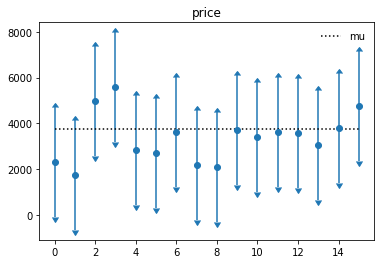


price mean: 3751.065
price std dev:3875.037052826075
n:10
confidence: 0.95

sample               sample mean          rho(+/-)             l                    u                    H0                   
0                    2327.0               2401.72871533771     -74.72871533771013   4728.72871533771     True                 
1                    1746.6               2401.72871533771     -655.1287153377102   4148.32871533771     True                 
2                    4988.5               2401.72871533771     2586.77128466229     7390.22871533771     True                 
3                    5574.9               2401.72871533771     3173.1712846622895   7976.62871533771     True                 
4                    2849.1               2401.72871533771     447.3712846622898    5250.82871533771     True                 
5                    2693.9               2401.72871533771     292.17128466228996   5095.628715337711    True                 
6                    3635.6       

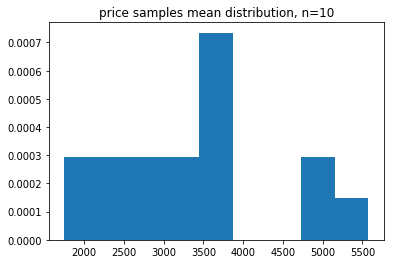

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


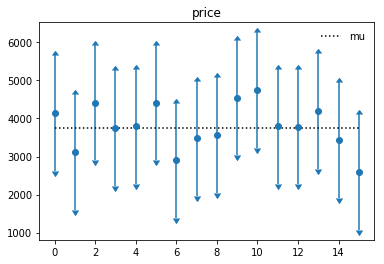


price mean: 3751.065
price std dev:3875.037052826075
n:25
confidence: 0.95

sample              sample mean         rho(+/-)            l                   u                   H0                  
0                   4141.56             1518.9866124594685  2622.573387540532   5660.546612459469   True                
1                   3114.68             1518.9866124594685  1595.6933875405314  4633.6666124594685  True                
2                   4418.84             1518.9866124594685  2899.853387540532   5937.826612459468   True                
3                   3746.56             1518.9866124594685  2227.5733875405313  5265.546612459469   True                
4                   3794.12             1518.9866124594685  2275.1333875405317  5313.106612459468   True                
5                   4416.6              1518.9866124594685  2897.613387540532   5935.586612459469   True                
6                   2901.52             1518.9866124594685  1382.53338754053

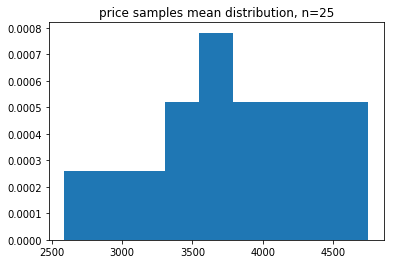

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


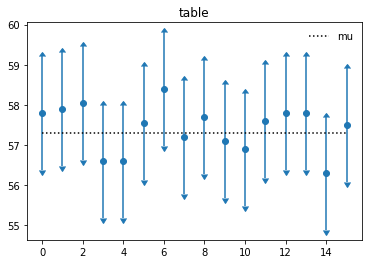


table mean: 57.298500000000004
table std dev:2.2752687203932647
n:10
confidence: 0.95

sample              sample mean         rho(+/-)            l                   u                   H0                  
0                   57.8                1.4102002500577018  56.3897997499423    59.210200250057696  True                
1                   57.9                1.4102002500577018  56.4897997499423    59.3102002500577    True                
2                   58.05               1.4102002500577018  56.6397997499423    59.460200250057696  True                
3                   56.6                1.4102002500577018  55.1897997499423    58.0102002500577    True                
4                   56.6                1.4102002500577018  55.1897997499423    58.0102002500577    True                
5                   57.55               1.4102002500577018  56.1397997499423    58.960200250057696  True                
6                   58.4                1.4102002500577018  56.98

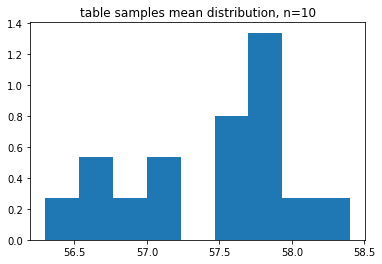

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


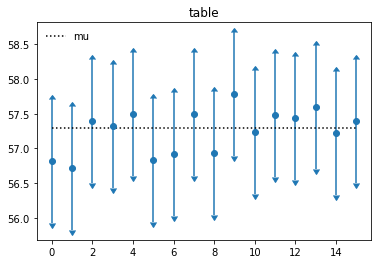


table mean: 57.298500000000004
table std dev:2.2752687203932647
n:25
confidence: 0.95

sample              sample mean         rho(+/-)            l                   u                   H0                  
0                   56.82               0.8918889494242667  55.92811105057574   57.711888949424264  True                
1                   56.72               0.8918889494242667  55.828111050575735  57.61188894942426   True                
2                   57.4                0.8918889494242667  56.508111050575735  58.29188894942426   True                
3                   57.32               0.8918889494242667  56.42811105057574   58.211888949424264  True                
4                   57.5                0.8918889494242667  56.60811105057574   58.39188894942426   True                
5                   56.84               0.8918889494242667  55.94811105057574   57.73188894942427   True                
6                   56.92               0.8918889494242667  56.02

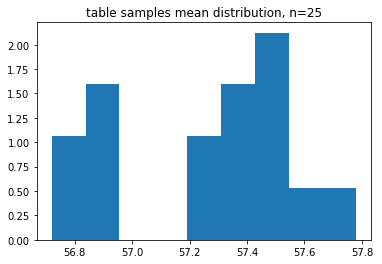

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [5]:
#np.random.seed(23456789)
createConfidenceIntervalsSamples(0.95, "price", n=10, samples=16)
createConfidenceIntervalsSamples(0.95, "price", n=25, samples=16)
createConfidenceIntervalsSamples(0.95, "table", n=10, samples=16)
createConfidenceIntervalsSamples(0.95, "table", n=25, samples=16)